# Visualization of data and simulations

In this notebook, we illustrate the visualization functions of petab.

In [1]:
from petab.visualize import plot_with_vis_spec, plot_without_vis_spec

In [2]:
folder = "example_Isensee/"

data_file_path = folder + "Isensee_measurementData.tsv"
condition_file_path = folder + "Isensee_experimentalCondition.tsv"
visualization_file_path = folder + "Isensee_visualizationSpecification.tsv"
simulation_file_path = folder + "Isensee_simulationData.tsv"

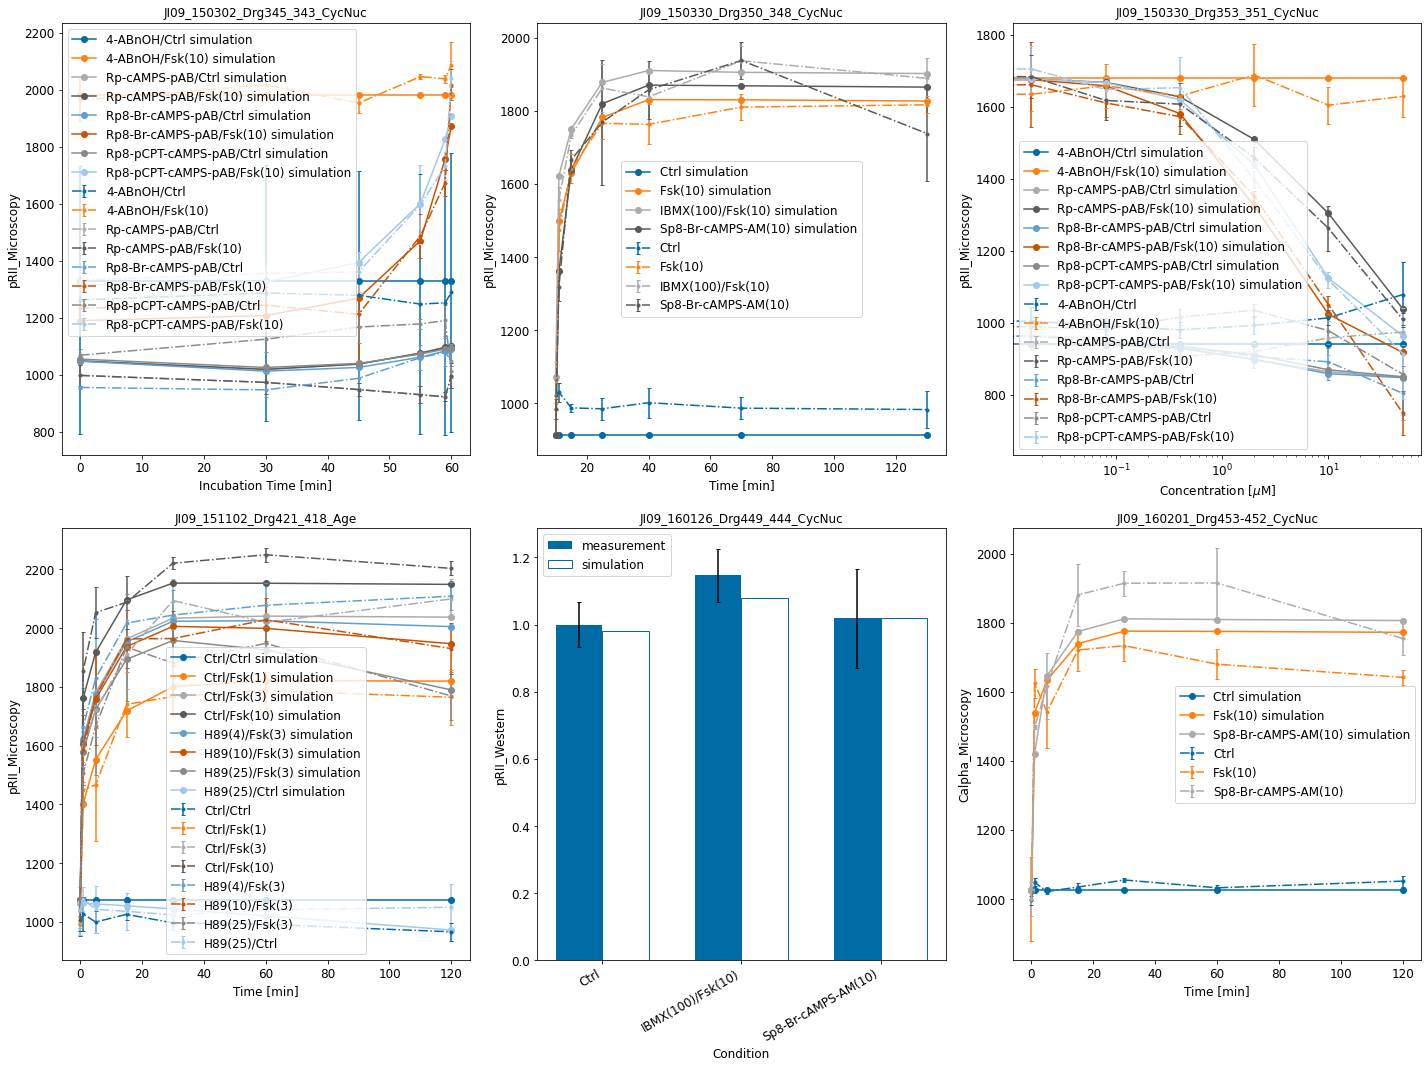

In [3]:
ax = plot_with_vis_spec(visualization_file_path, condition_file_path,
                        data_file_path, simulation_file_path)

Now, we want to call the plotting routines without using the simulated data, only the visualization specification file.

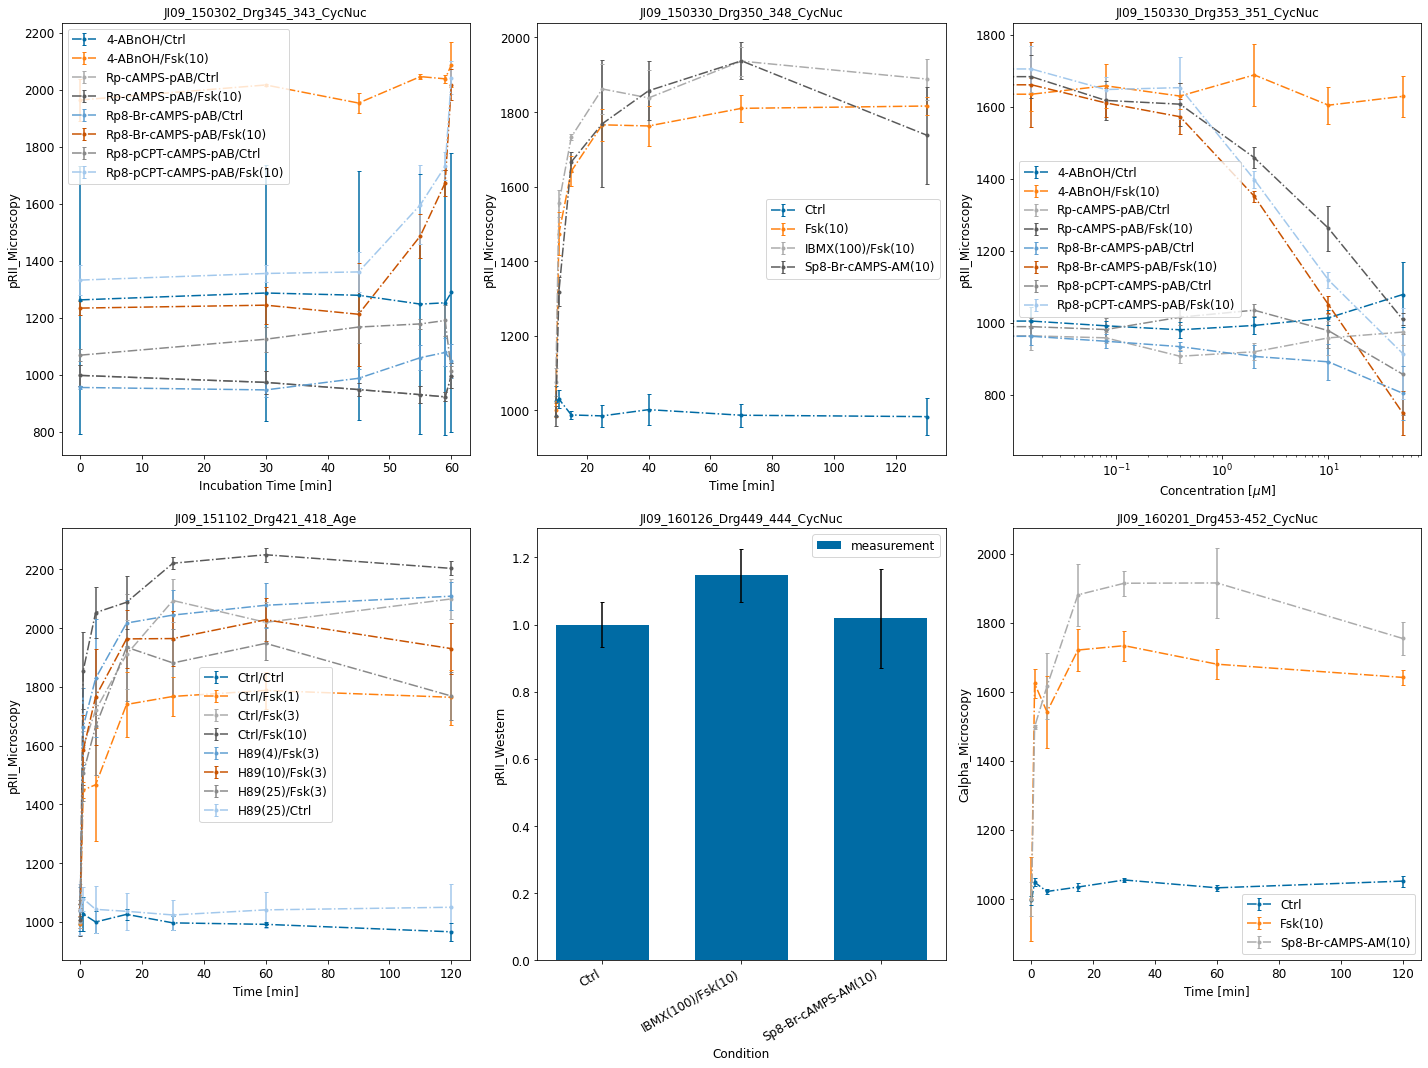

In [4]:
ax_without_sim = plot_with_vis_spec(visualization_file_path, condition_file_path, data_file_path)

One can also plot only simulated data:

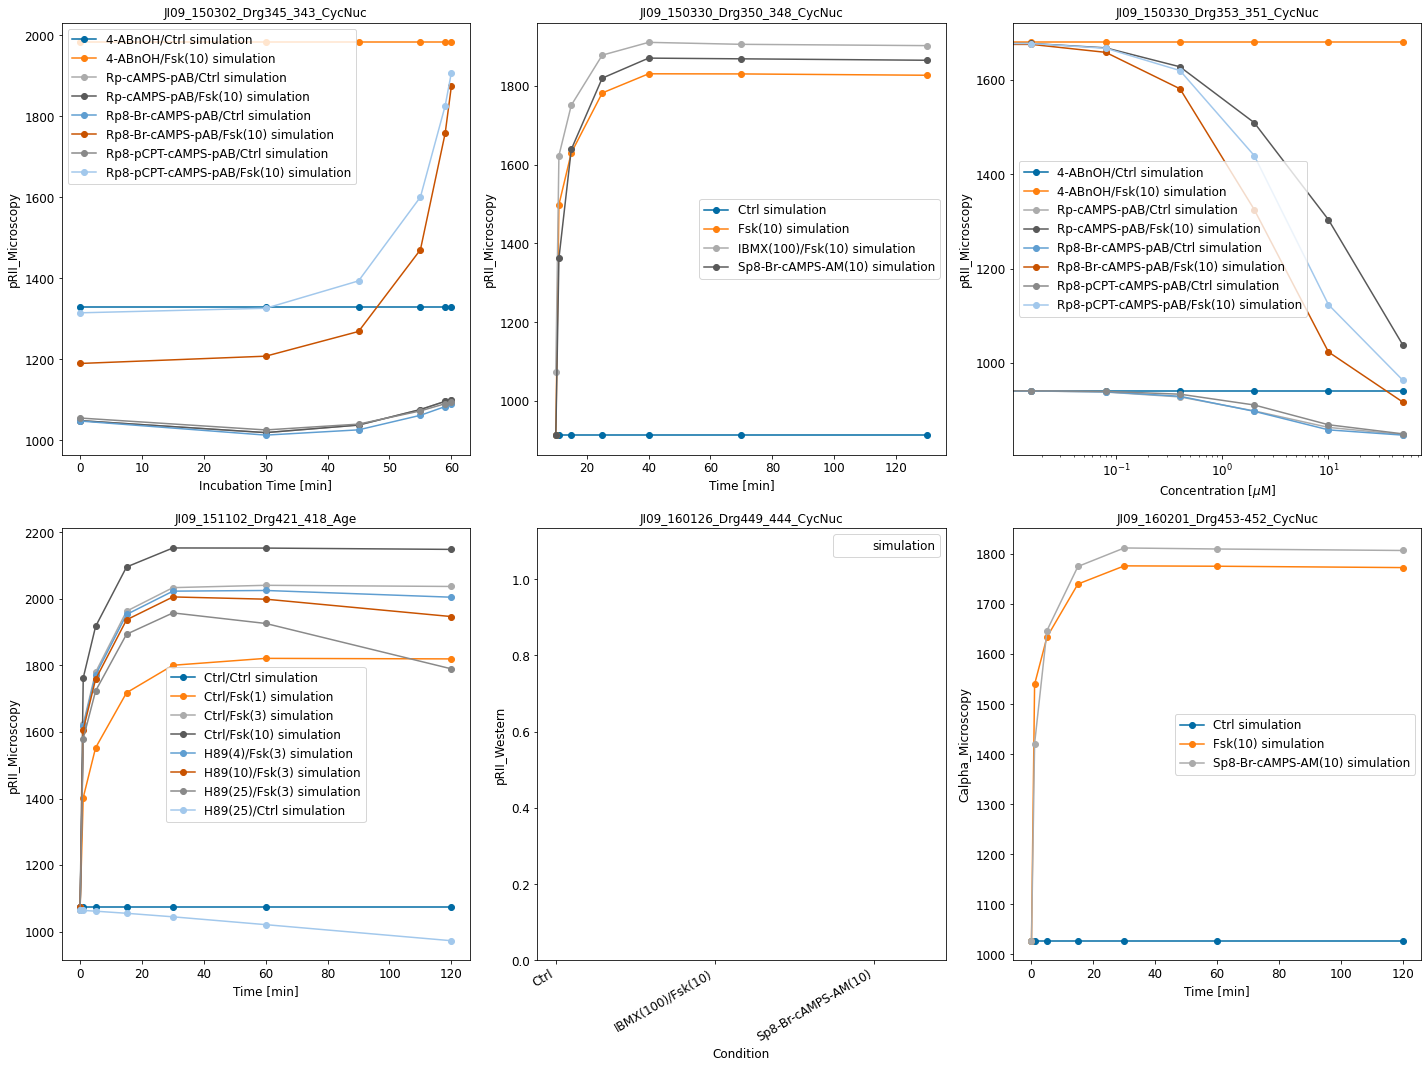

In [5]:
ax = plot_with_vis_spec(visualization_file_path, condition_file_path,
                        simulations_df = simulation_file_path)

If both measurements and simulated data are available, they can be visualized using scatter plot:

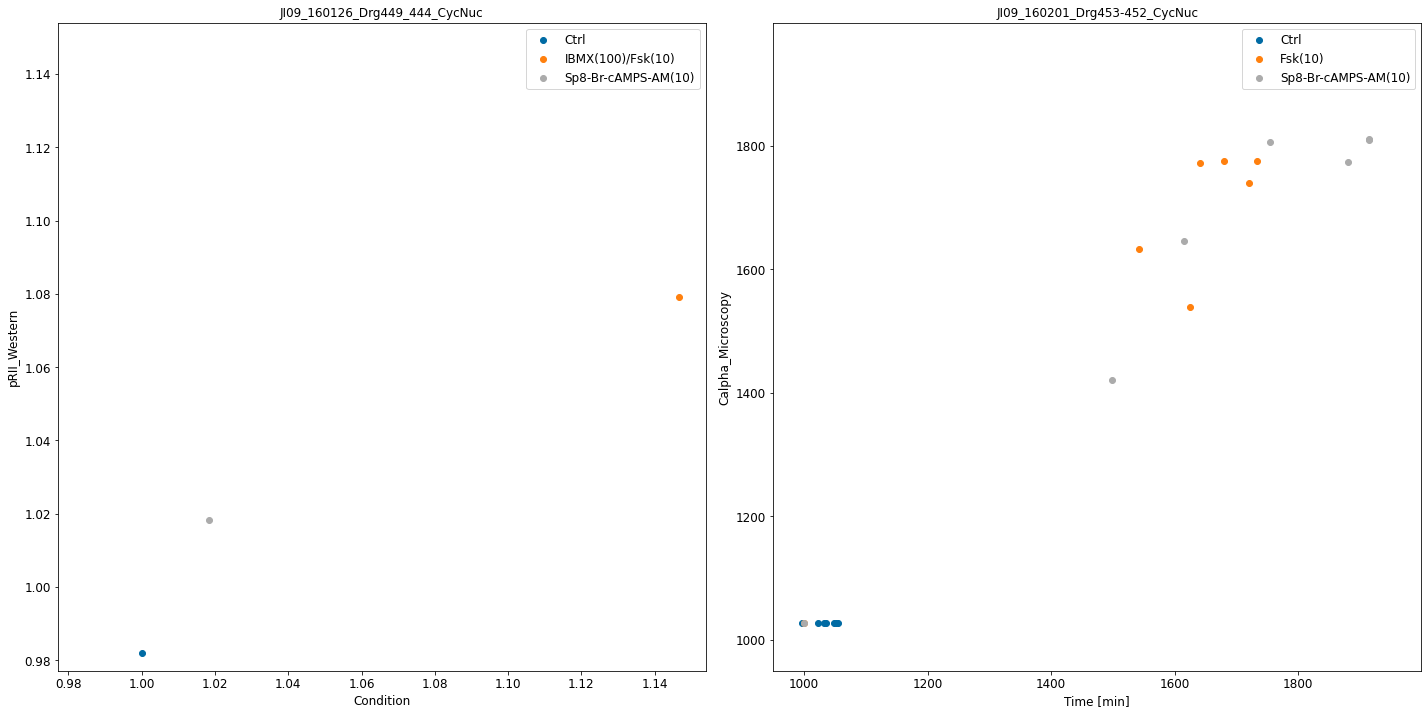

In [6]:
visualization_file_scatterplots = folder + "Isensee_visualizationSpecification_scatterplot.tsv"
ax = plot_with_vis_spec(visualization_file_scatterplots, condition_file_path,
                   data_file_path, simulation_file_path)

We can also call the plotting routine without the visualization specification file, but by passing a list of lists as `dataset_id_list`. Each sublist corresponds to a plot, and contains the datasetIds which should be plotted.
In this simply structured plotting routine, the independent variable will always be time.

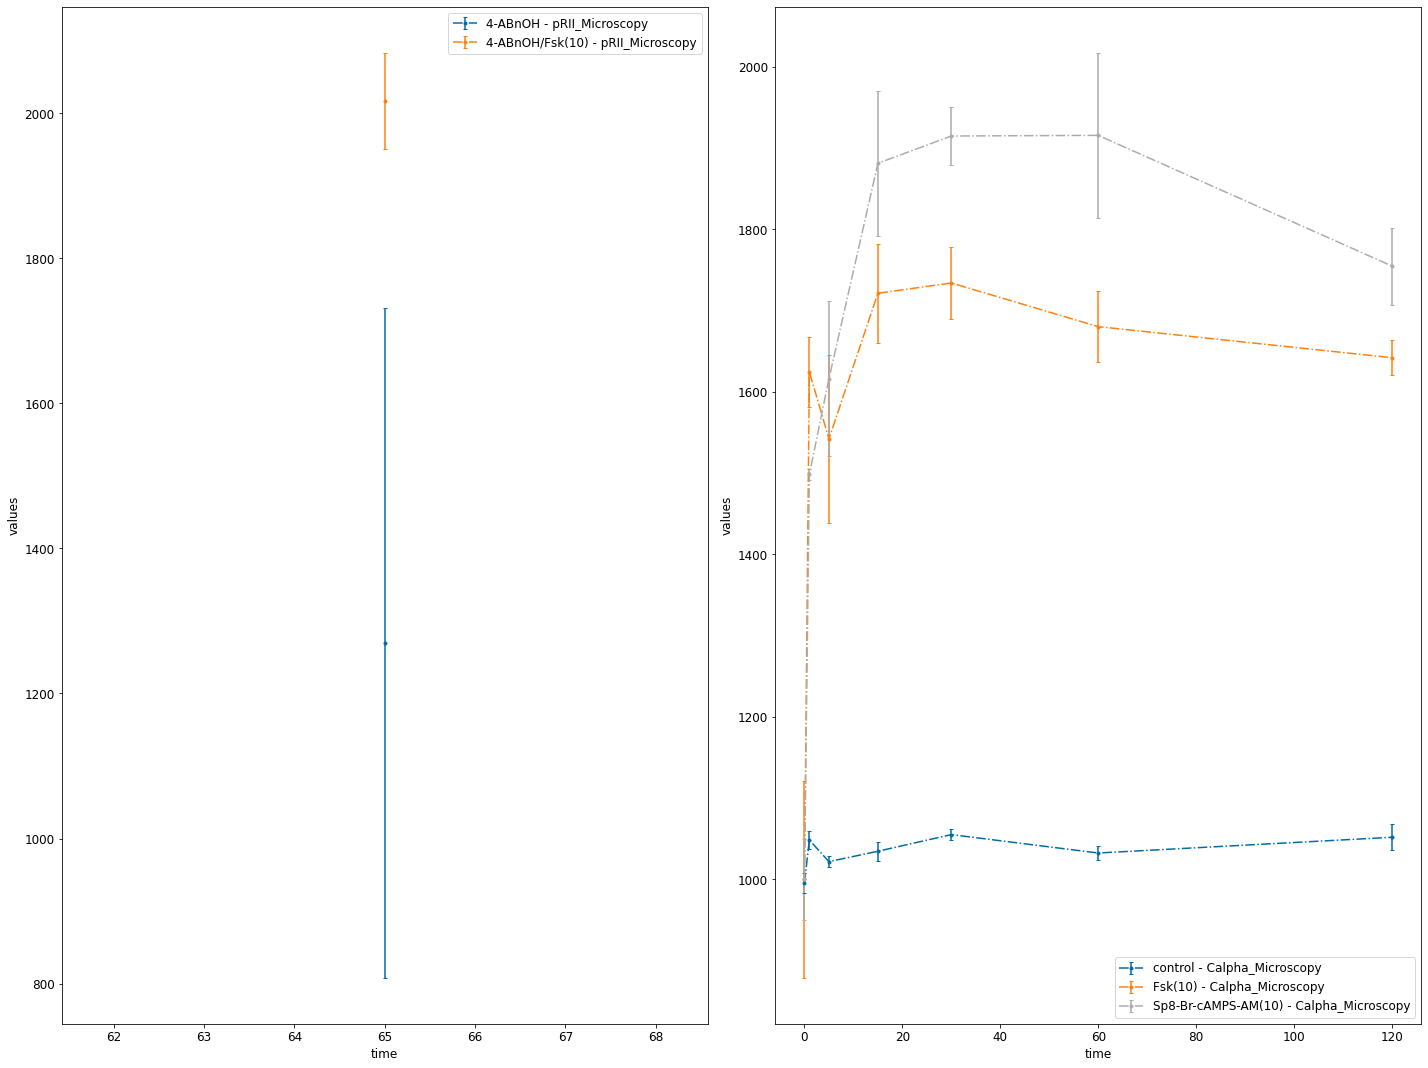

In [7]:
datasets = [['JI09_150302_Drg345_343_CycNuc__4_ABnOH_and_ctrl',
             'JI09_150302_Drg345_343_CycNuc__4_ABnOH_and_Fsk'],
            ['JI09_160201_Drg453-452_CycNuc__ctrl',
             'JI09_160201_Drg453-452_CycNuc__Fsk',
             'JI09_160201_Drg453-452_CycNuc__Sp8_Br_cAMPS_AM']]
ax_without_sim = plot_without_vis_spec(condition_file_path, datasets, 'dataset',
                                       data_file_path)

Let's look more closely at the plotting routines, if no visualization specification file is provided. If such a file is missing, PEtab needs to know how to group the data points. For this, three options can be used:
 * dataset_id_list
 * sim_cond_id_lis
 * observable_id_list

Each of them is a list of lists. Again, each sublist is a plot and its content are either simulation condition IDs or observable IDs or the dataset IDs.

We want to illustrate this functionality by using a simpler example, a model published in 2010 by Fujita et al.

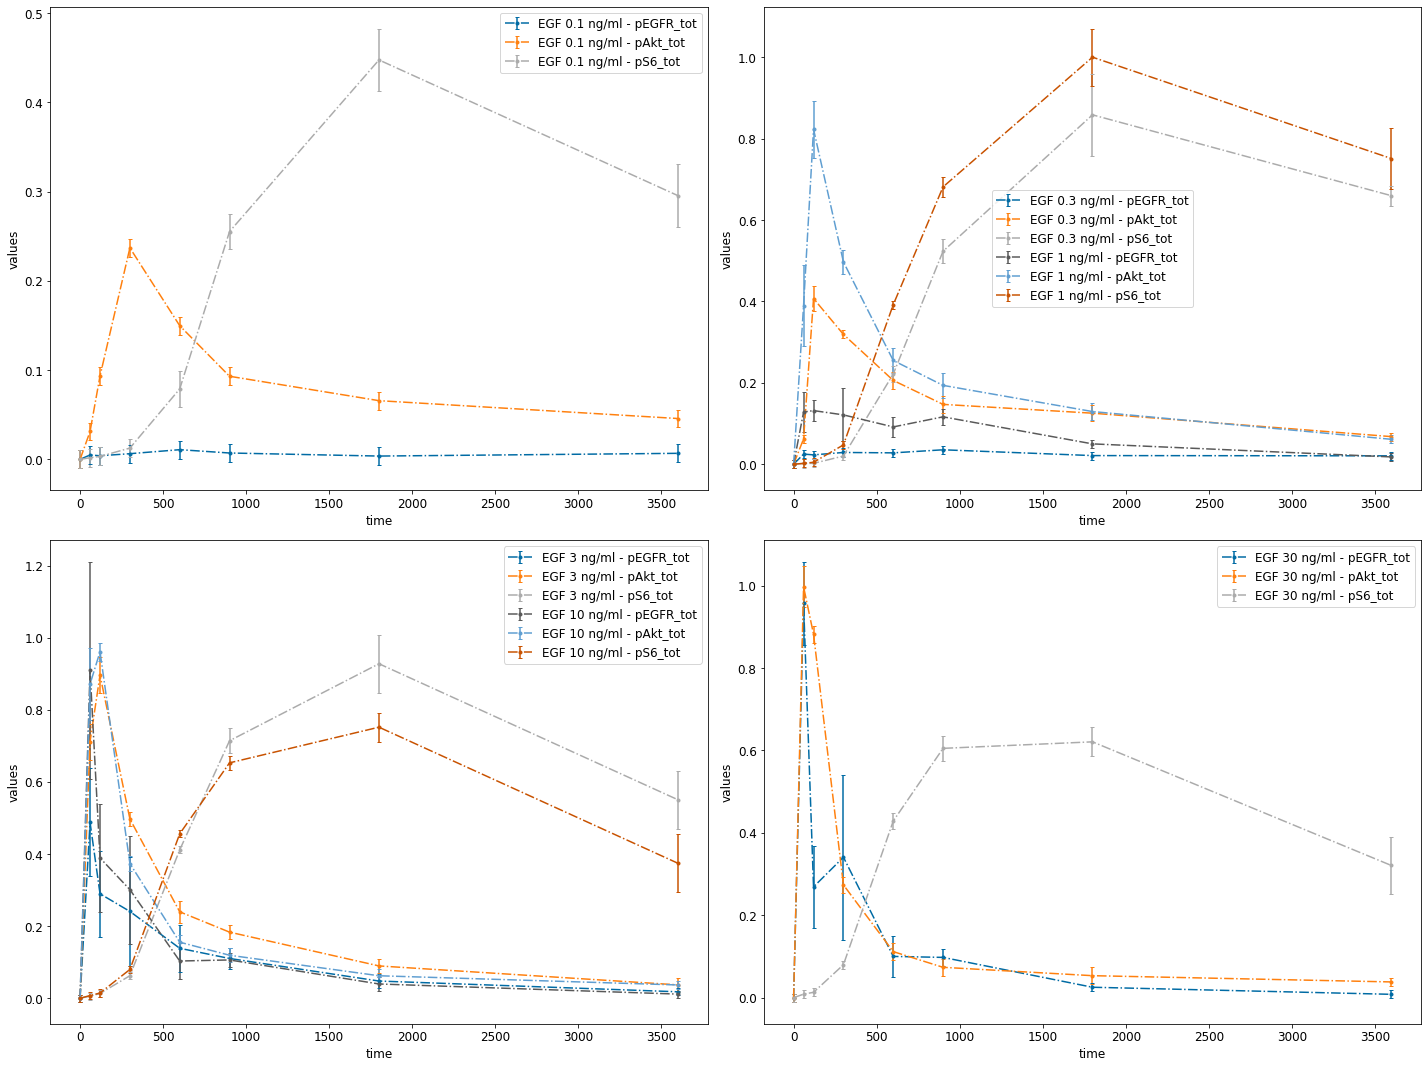

In [8]:
data_file_Fujita = "example_Fujita/Fujita_measurementData.tsv"
condition_file_Fujita = "example_Fujita/Fujita_experimentalCondition.tsv"

# Plot 4 axes objects, plotting 
# - in the first window  all observables of the simulation condition 'model1_data1'
# - in the second window all observables of the simulation conditions 'model1_data2', 'model1_data3'
# - in the third window  all observables of the simulation conditions 'model1_data4', 'model1_data5'
# - in the fourth window all observables of the simulation condition 'model1_data6'

sim_cond_id_list = [['model1_data1'], ['model1_data2', 'model1_data3'],
                    ['model1_data4', 'model1_data5'], ['model1_data6']]

ax = plot_without_vis_spec(condition_file_Fujita, sim_cond_id_list,
                           'simulation', data_file_Fujita,
                           plotted_noise='provided')

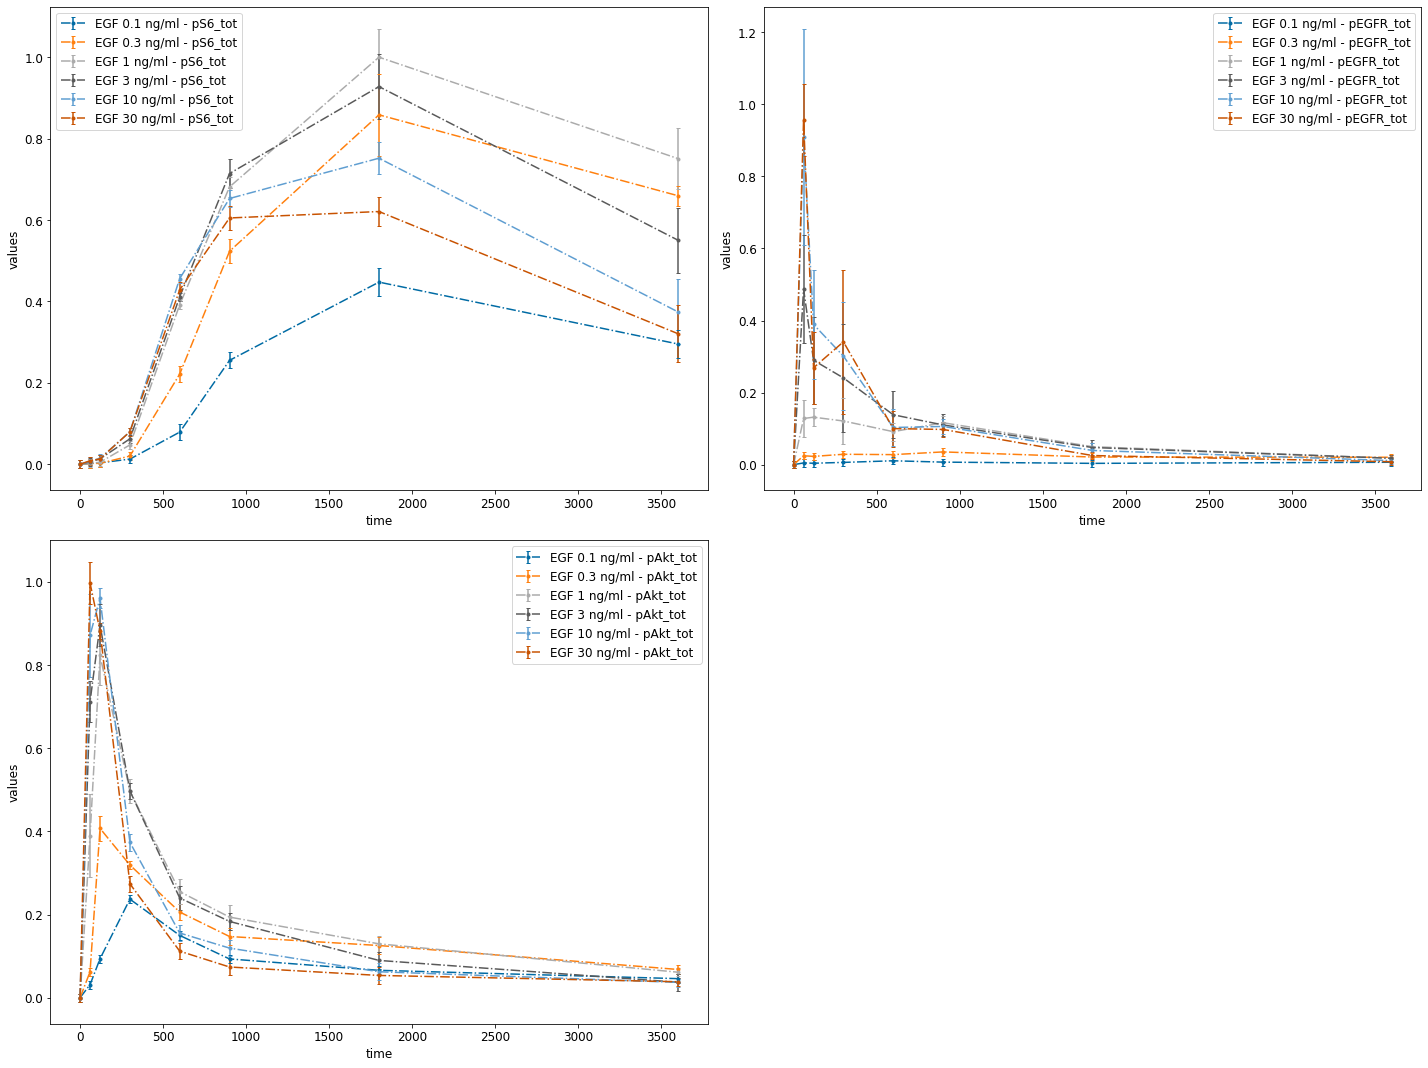

In [9]:
# Plot 3 axes objects, plotting
# - in the first window  the observable 'pS6_tot' for all simulation conditions
# - in the second window the observable 'pEGFR_tot' for all simulation conditions
# - in the third window  the observable 'pAkt_tot' for all simulation conditions

observable_id_list = [['pS6_tot'], ['pEGFR_tot'], ['pAkt_tot']]


ax = plot_without_vis_spec(condition_file_Fujita, observable_id_list,
                           'observable', data_file_Fujita,
                           plotted_noise='provided')

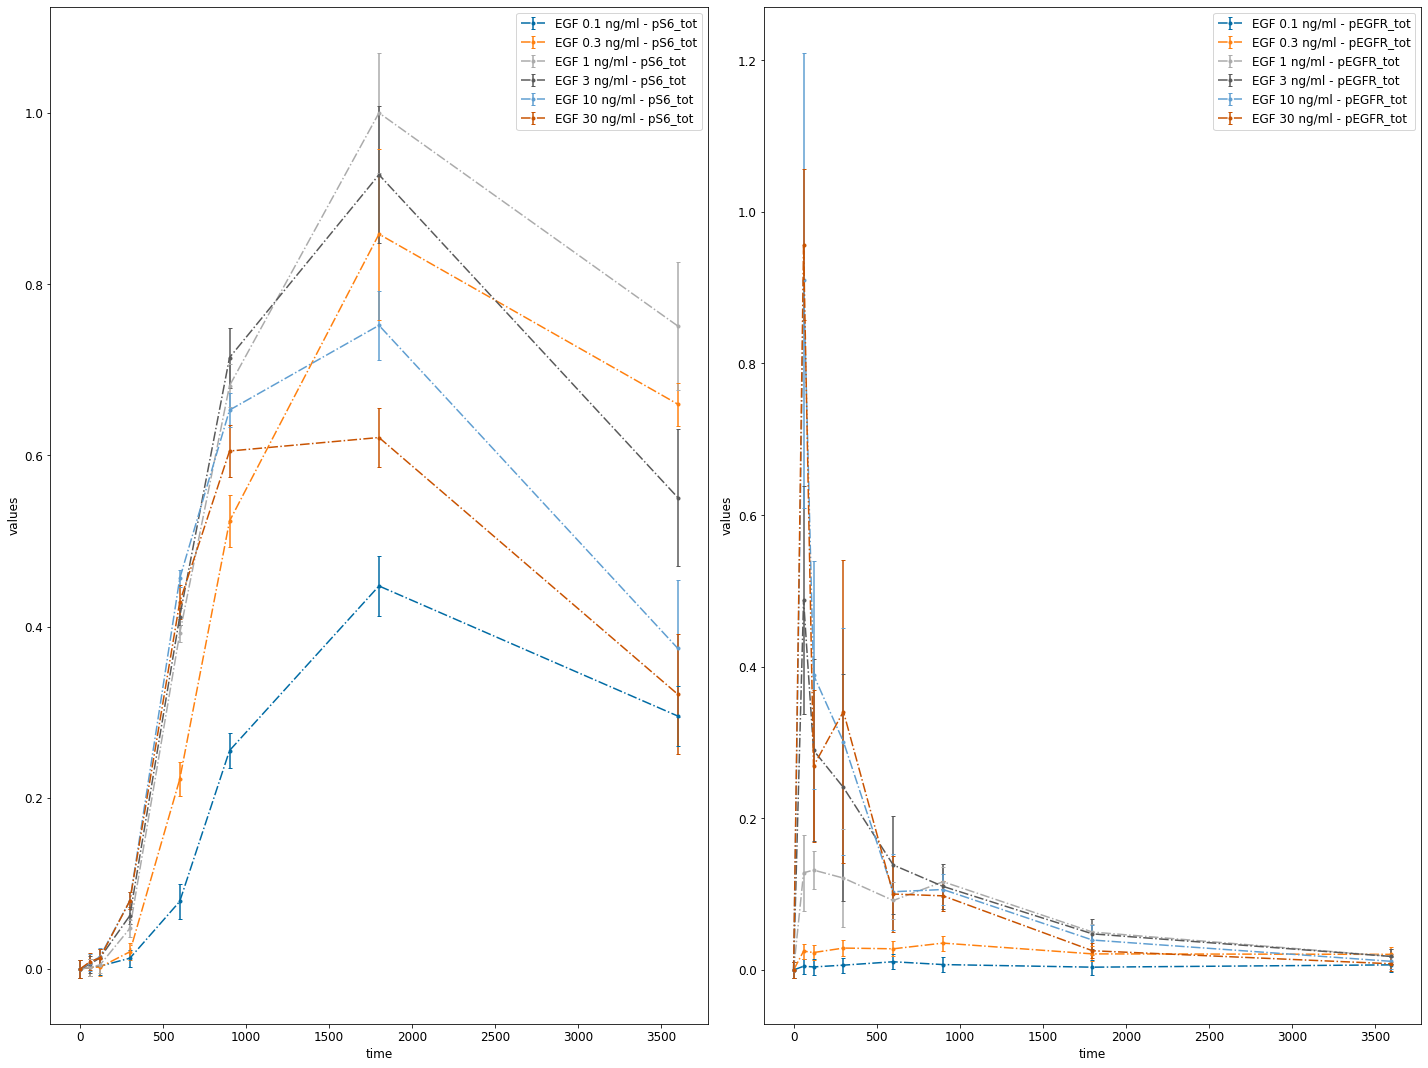

In [10]:
# Plot 2 axes objects, plotting
# - in the first window  the observable 'pS6_tot' for all simulation conditions
# - in the second window the observable 'pEGFR_tot' for all simulation conditions
# - in the third window  the observable 'pAkt_tot' for all simulation conditions
# while using the noise values which are saved in the PEtab files

observable_id_list = [['pS6_tot'], ['pEGFR_tot']]


ax = plot_without_vis_spec(condition_file_Fujita, observable_id_list,
                           'observable', data_file_Fujita,
                           plotted_noise='provided')

Plot only simulations

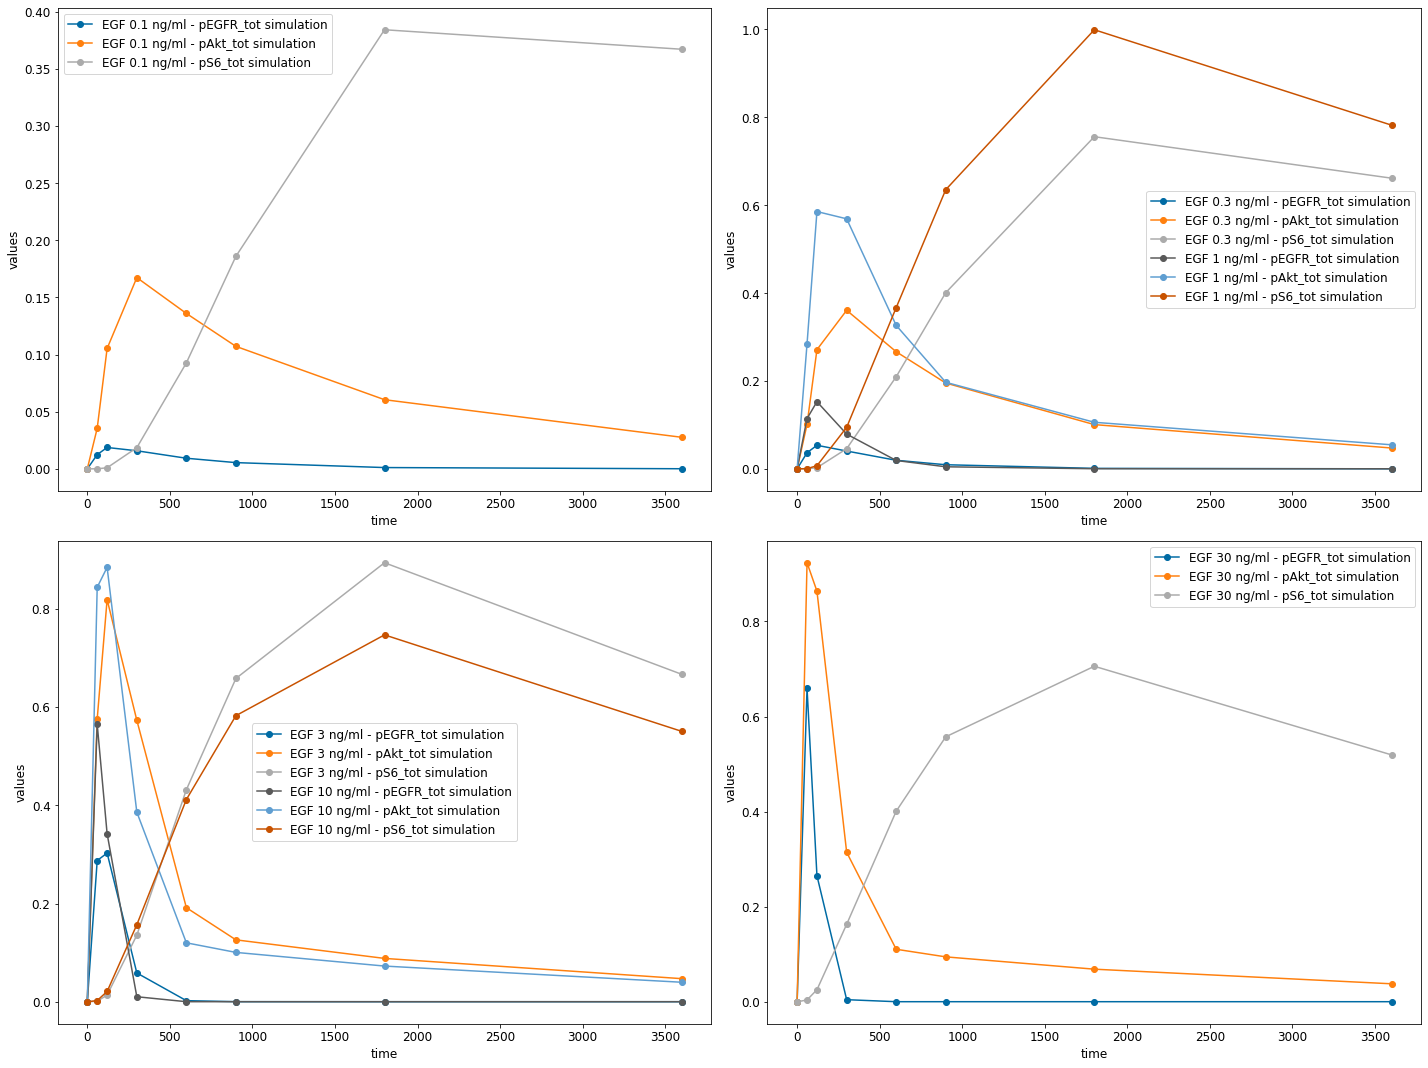

In [11]:
simu_file_Fujita = "example_Fujita/Fujita_simulatedData.tsv"

sim_cond_id_list = [['model1_data1'], ['model1_data2', 'model1_data3'],
                    ['model1_data4', 'model1_data5'], ['model1_data6']]

ax = plot_without_vis_spec(condition_file_Fujita, sim_cond_id_list,
                           'simulation', simulations_df=simu_file_Fujita,
                           plotted_noise='provided')

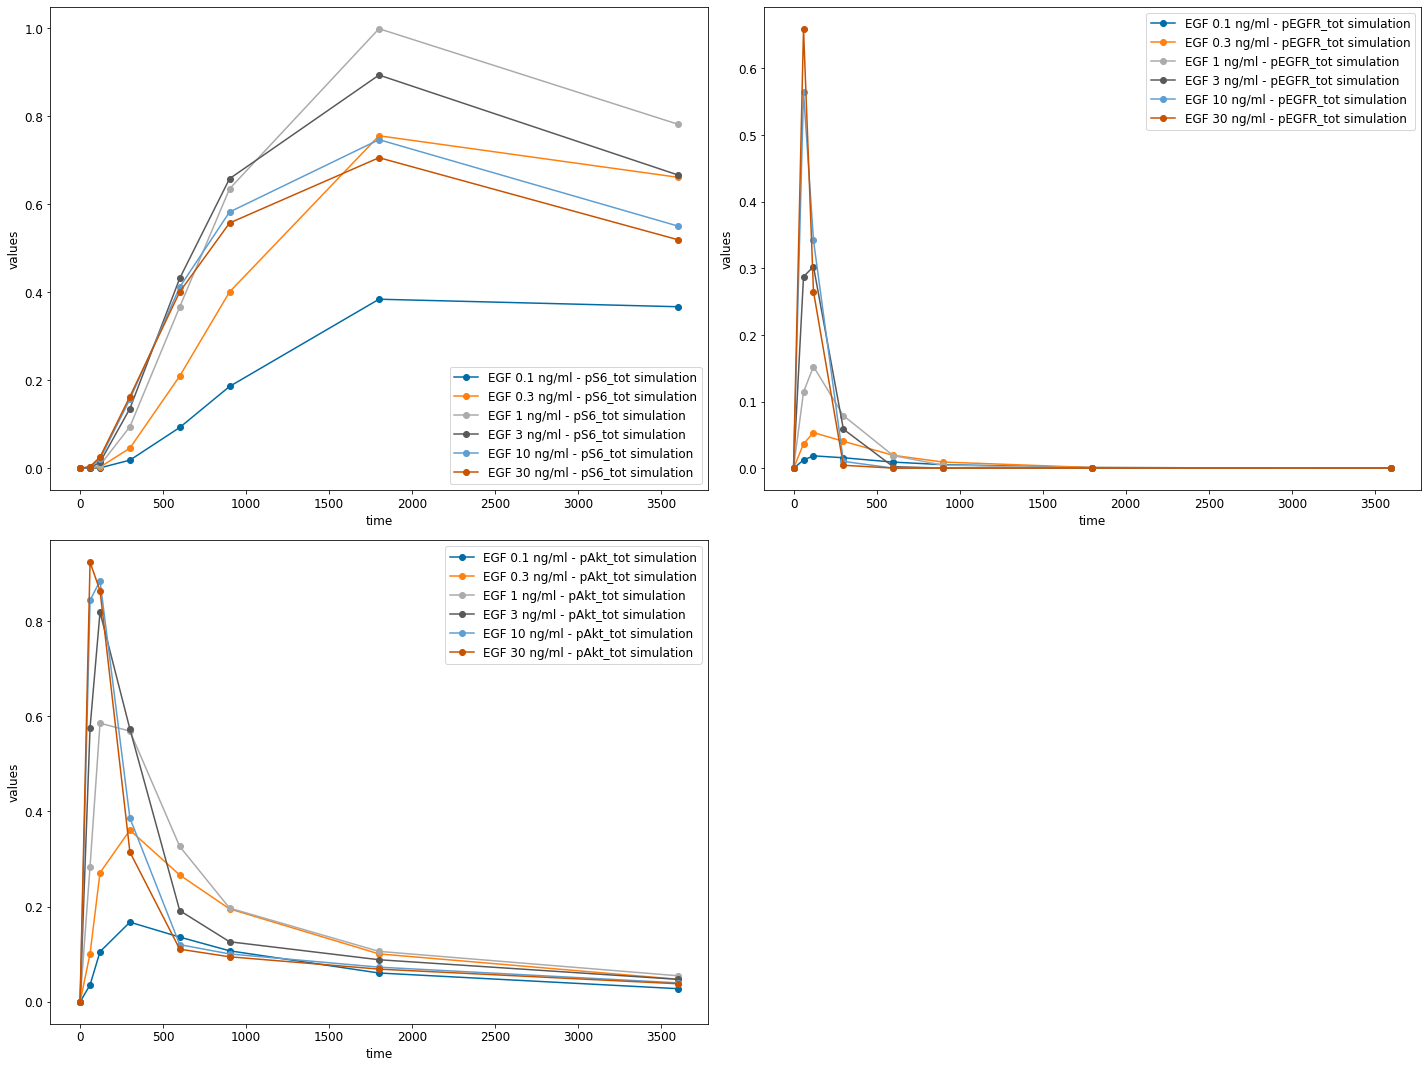

In [12]:
observable_id_list = [['pS6_tot'], ['pEGFR_tot'], ['pAkt_tot']]

ax = plot_without_vis_spec(condition_file_Fujita, observable_id_list,
                           'observable', simulations_df=simu_file_Fujita,
                           plotted_noise='provided')